In [1]:
from src.data import DataLoaders
from src import utils
import pathlib
import pandas as pd
from src.models.ModelClasses import FireRiskModels, SmokeAlarmModels
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import date
import numpy as np
#import geopandas as geo
import folium
import seaborn as sns
import pandas_profiling as pd_p

In [55]:
ACS =  DataLoaders.ACSData(2016,'block_group', 0)

In [3]:
ACS.data

state  tot_population  in_poverty  inc_pct_poverty  inc_pcincome  \
GEOID                                                                           
010010201001    AL           745.0       143.0         0.191946       20365.0   
010010201002    AL          1265.0        56.0         0.044269       33336.0   
010010202001    AL           955.0       365.0         0.382199       17047.0   
010010202002    AL          1059.0       118.0         0.111426       21400.0   
010010203001    AL          2364.0       100.0         0.042301       23106.0   
...            ...             ...         ...              ...           ...   
560459511001    WY          1457.0       137.0         0.094029       33781.0   
560459511002    WY          1582.0        99.0         0.062579       34002.0   
560459513001    WY          1151.0       301.0         0.261512       23326.0   
560459513002    WY          1030.0       101.0         0.098058       31463.0   
560459513003    WY          1599.0       364.0         0.227642       23422.0   

              race_pct_white  race_pct_whitenh  race_pct_nonwhite  \
GEOID                                                               
010010201001        0.785235          0.763758           0.214765   
010010201002        0.856126          0.826877           0.143874   
010010202001        0.376042          0.376042           0.623958   
010010202002        0.497573          0.488673           0.502427   
010010203001        0.626481          0.626481           0.373519   
...                      ...               ...                ...   
560459511001        0.950583          0.929307           0.049417   
560459511002        0.935884          0.918642           0.064116   
560459513001        1.000000          1.000000           0.000000   
560459513002        0.982014          0.976619           0.017986   
560459513003        0.826141          0.826141           0.173859   

              race_pct_nonwhitenh  race_pct_amind  ...  \
GEOID                                              ...   
010010201001             0.236242        0.000000  ...   
010010201002             0.173123        0.000000  ...   
010010202001             0.623958        0.000000  ...   
010010202002             0.511327        0.000000  ...   
010010203001             0.373519        0.009306  ...   
...                           ...             ...  ...   
560459511001             0.070693        0.000000  ...   
560459511002             0.081358        0.004849  ...   
560459513001             0.000000        0.000000  ...   
560459513002             0.023381        0.000000  ...   
560459513003             0.173859        0.000000  ...   

              house_yr_pct_before_1960  house_yr_pct_after_2000  \
GEOID                                                             
010010201001                  0.221831                 0.193662   
010010201002                  0.079229                 0.085653   
010010202001                  0.135678                 0.211055   
010010202002                  0.235772                 0.075203   
010010203001                  0.030303                 0.091887   
...                                ...                      ...   
560459511001                  0.308305                 0.121729   
560459511002                  0.197500                 0.337500   
560459513001                  0.556757                 0.000000   
560459513002                  0.595122                 0.136585   
560459513003                  0.292758                 0.107858   

              house_yr_pct_1960_2000  house_val_less_50K  house_val_50_100K  \
GEOID                                                                         
010010201001                0.584507            0.152047           0.274854   
010010201002                0.835118            0.100264           0.153034   
010010202001                0.653266            0.171053           0.337719   
010010202002                0.689024   

In [4]:
NFIRS = DataLoaders.NFIRSData('block_group',ACS.tot_pop)
NFIRS_Sev = DataLoaders.NFIRSData('block_group',ACS.tot_pop, sev=True)

/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
NFIRS.fires

2009      2010      2011      2012      2013      2014  \
geoid                                                                      
010010201001  1.342282  2.684564       NaN       NaN       NaN       NaN   
010010201002  1.581028  0.790514       NaN  1.581028  0.790514       NaN   
010010202001  1.047120       NaN  3.141361       NaN  1.047120  1.047120   
010010202002  2.832861  2.832861  2.832861  0.944287  0.944287       NaN   
010010203001  0.846024  1.269036  0.846024  0.423012  1.269036  0.423012   
...                ...       ...       ...       ...       ...       ...   
560459511001       NaN       NaN       NaN       NaN       NaN       NaN   
560459511002  0.632111       NaN       NaN       NaN       NaN       NaN   
560459513001  0.868810       NaN  0.868810       NaN  0.868810  0.868810   
560459513002       NaN       NaN  0.970874       NaN       NaN  0.970874   
560459513003       NaN       NaN  0.625391  0.625391       NaN  0.625391   

                  2015      2016      2017  
geoid                                       
010010201001       NaN  1.342282  1.342282  
010010201002  1.581028  0.790514       NaN  
010010202001  1.047120  1.047120       NaN  
010010202002  0.944287       NaN  3.777148  
010010203001  0.423012  0.846024       NaN  
...                ...       ...       ...  
560459511001       NaN  1.372684       NaN  
560459511002  0.632111       NaN       NaN  
560459513001       NaN       NaN  1.737619  
560459513002       NaN       NaN       NaN  
560459513003       NaN       NaN       NaN  

[216321 rows x 9 columns]

In [56]:
ACS_cols_to_use =[ 'did_not_work_past_12_mo',
               'house_pct_live_alone',
               'house_yr_pct_before_1960',
               'inc_pct_poverty',
               'race_pct_black_or_amind']

In [57]:
ACS_cols = ACS.data[ACS_cols_to_use]
ACS_cols

did_not_work_past_12_mo  house_pct_live_alone  \
GEOID                                                         
010010201001                 0.355019              0.221831   
010010201002                 0.309021              0.127193   
010010202001                 0.509589              0.344560   
010010202002                 0.309886              0.338496   
010010203001                 0.294054              0.276699   
...                               ...                   ...   
560459511001                 0.301663              0.324047   
560459511002                 0.288010              0.258713   
560459513001                 0.232123              0.330784   
560459513002                 0.456522              0.457810   
560459513003                 0.352622              0.249201   

              house_yr_pct_before_1960  inc_pct_poverty  \
GEOID                                                     
010010201001                  0.221831         0.191946   
010010201002                  0.079229         0.044269   
010010202001                  0.135678         0.382199   
010010202002                  0.235772         0.111426   
010010203001                  0.030303         0.042301   
...                                ...              ...   
560459511001                  0.308305         0.094029   
560459511002                  0.197500         0.062579   
560459513001                  0.556757         0.261512   
560459513002                  0.595122         0.098058   
560459513003                  0.292758         0.227642   

              race_pct_black_or_amind  
GEOID                                  
010010201001                 0.214765  
010010201002                 0.082213  
010010202001                 0.591667  
010010202002                 0.461974  
010010203001                 0.227157  
...                               ...  
560459511001                 0.000000  
560459511002                 0.014547  
560459513001                 0.000000  
560459513002                 0.000000  
560459513003                 0.000000  

[217739 rows x 5 columns]

In [8]:
FSM =  FireRiskModels('severity')
FPM =  FireRiskModels('propensity')

In [9]:
NFIRS.fires

2009      2010      2011      2012      2013      2014  \
geoid                                                                      
010010201001  1.342282  2.684564       NaN       NaN       NaN       NaN   
010010201002  1.581028  0.790514       NaN  1.581028  0.790514       NaN   
010010202001  1.047120       NaN  3.141361       NaN  1.047120  1.047120   
010010202002  2.832861  2.832861  2.832861  0.944287  0.944287       NaN   
010010203001  0.846024  1.269036  0.846024  0.423012  1.269036  0.423012   
...                ...       ...       ...       ...       ...       ...   
560459511001       NaN       NaN       NaN       NaN       NaN       NaN   
560459511002  0.632111       NaN       NaN       NaN       NaN       NaN   
560459513001  0.868810       NaN  0.868810       NaN  0.868810  0.868810   
560459513002       NaN       NaN  0.970874       NaN       NaN  0.970874   
560459513003       NaN       NaN  0.625391  0.625391       NaN  0.625391   

                  2015      2016      2017  
geoid                                       
010010201001       NaN  1.342282  1.342282  
010010201002  1.581028  0.790514       NaN  
010010202001  1.047120  1.047120       NaN  
010010202002  0.944287       NaN  3.777148  
010010203001  0.423012  0.846024       NaN  
...                ...       ...       ...  
560459511001       NaN  1.372684       NaN  
560459511002  0.632111       NaN       NaN  
560459513001       NaN       NaN  1.737619  
560459513002       NaN       NaN       NaN  
560459513003       NaN       NaN       NaN  

[216321 rows x 9 columns]

In [10]:
FPM.train(NFIRS,ACS,ACS_cols_to_use)

/home/kelsonss/Documents/GitHub/rcp2/src/models/ModelClasses.py:179: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Predicting 2017:
[[159423  46995]
 [  2319   9002]]
0.8671176529138945
              precision    recall  f1-score   support

       False       0.99      0.77      0.87    206418
        True       0.16      0.80      0.27     11321

    accuracy                           0.77    217739
   macro avg       0.57      0.78      0.57    217739
weighted avg       0.94      0.77      0.83    217739

Feature ranking:
1. Max (0.427508)
2. Median (0.136157)
3. pct_alt_heat (0.082652)
4. house_pct_live_alone (0.077553)
5. inc_pct_poverty (0.072500)
6. race_pct_black_or_amind (0.069879)
7. house_yr_pct_before_1960 (0.068611)
8. did_not_work_past_12_mo (0.065140)


In [11]:
FPM.years_used

array(['2011', '2012', '2013', '2014', '2015', '2016', '2017'],
      dtype=object)

In [12]:
FSM.train(NFIRS_Sev,ACS,ACS_cols_to_use)

/home/kelsonss/Documents/GitHub/rcp2/src/models/ModelClasses.py:179: RuntimeWarning: All-NaN axis encountered
  mx = np.nanmax(X, axis =1)
/home/kelsonss/anaconda3/envs/rcp2/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Predicting 2017:
[[163538  50467]
 [  1023   2711]]
0.8247673238766565
              precision    recall  f1-score   support

       False       0.99      0.76      0.86    214005
        True       0.05      0.73      0.10      3734

    accuracy                           0.76    217739
   macro avg       0.52      0.75      0.48    217739
weighted avg       0.98      0.76      0.85    217739

Feature ranking:
1. Median (0.355454)
2. Max (0.195375)
3. pct_alt_heat (0.077562)
4. race_pct_black_or_amind (0.077486)
5. house_pct_live_alone (0.076930)
6. did_not_work_past_12_mo (0.074547)
7. house_yr_pct_before_1960 (0.072959)
8. inc_pct_poverty (0.069686)


In [13]:
len(FSM.test_prediction_probs[:,1])

217739

In [14]:
ARC =  DataLoaders.ARCPData(ACS)

In [15]:
ARCdata = ARC.data
ARCdata

geoid  census_block_group_y  census_block_group_x        city  \
12      010010205002             32.470418            -86.424166  PRATTVILLE   
18      010010208012             32.455173            -86.534591  PRATTVILLE   
23      010010208021             32.524822            -86.573009  PRATTVILLE   
24      010010208021             32.524822            -86.573009  PRATTVILLE   
27      010010208023             32.543983            -86.492100  PRATTVILLE   
...              ...                   ...                   ...         ...   
862041  560459513003             43.843551           -104.260072   NEWCASTLE   
862042  560459513003             43.843551           -104.260072   NEWCASTLE   
862043  560459513003             43.843551           -104.260072   NEWCASTLE   
862044  560459513003             43.843551           -104.260072   NEWCASTLE   
862056  560459513003             43.843551           -104.260072   NEWCASTLE   

       state    zip   county in_home_visit_date  \
12        AL  36066  Autauga           9/9/2016   
18        AL  36067  Autauga          9/30/2019   
23        AL  36067  Autauga           5/4/2019   
24        AL  36067  Autauga          9/27/2019   
27        AL  36067  Autauga          12/2/2017   
...      ...    ...      ...                ...   
862041    WY  82701   Weston           3/4/2017   
862042    WY  82701   Weston           3/4/2017   
862043    WY  82701   Weston           3/4/2017   
862044    WY  82701   Weston           3/4/2017   
862056    WY  82701   Weston          6/28/2019   

        smoke_alarms_installed__9_volt_10_year_dhh_  \
12                                                1   
18                                                2   
23                                                3   
24                                                1   
27                                                3   
...                                             ...   
862041                                            2   
862042                                            3   
862043                                            3   
862044                                            4   
862056                                            4   

        10_year_and_9_volt_alarms_installed  ...  batteries_replaced  \
12                                        1  ...                   0   
18                                        2  ...                   0   
23                                        2  ...                   0   
24                                        1  ...                   0   
27                                        3  ...                   0   
...                                     ...  ...                 ...   
862041                                    2  ...                   0   
862042                                    3  ...                   0   
862043                                    3  ...                   0   
862044                                    4  ...                   0   
862056                                    4  ...                   0   

        fire_escape_plans_made  fire_safety_checklists_completed  \
12                           1                                 1   
18                           1                                 1   
23                           1                                 1   
24                           1                                 1   
27                           1                                 1   
...                        ...                               ...   
862041                       1                                 1   
862042                       1                                 1   
862043                       1                                 1   
862044                       1                                 1   
862056                       1                                 1   

        additional_hazard_education_conducted  additional_hazard_type  \
12                       

In [16]:
SVI =  DataLoaders.SVIData(ACS.data)
SVI.data = SVI.data[['RPL_THEME1','RPL_THEME3']]

In [17]:
Smoke = SmokeAlarmModels()

In [61]:
ACS_cols_to_use

['did_not_work_past_12_mo',
 'house_pct_live_alone',
 'house_yr_pct_before_1960',
 'inc_pct_poverty',
 'race_pct_black_or_amind']

-----Training_Performance------
132.8979577401726
Test RMSE: 11.528137652724858
Test MAE: 8.750146538015283


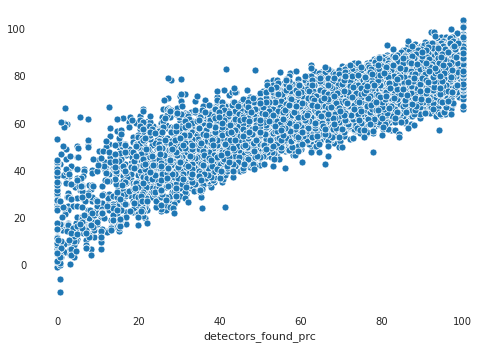

-----Test Performance ----- 
Test RMSE: 16.35608774532017
Test MAE: 12.574630944820084


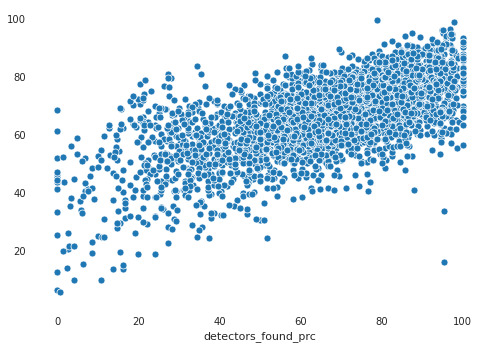

Test Correlation: (0.6715397692734911, 0.0)
Test R-squared: 0.44397839927668303

 Feature ranking:
1. RPL_THEME1 (0.262402)
2. RPL_THEME3 (0.171998)
3. Population Density (per square mile), 2010 (0.146865)
4. race_pct_black_or_amind (0.112378)
5. house_yr_pct_before_1960 (0.094379)
6. inc_pct_poverty (0.077469)
7. house_pct_live_alone (0.071441)
8. did_not_work_past_12_mo (0.063069)


In [58]:
svi_use = True
smoke_prediction = Smoke.trainModels(ARC,ACS,SVI, ACS_cols_to_use,svi_use, utils.DATA['data'])

In [ ]:
sns.scatterplot(out.SVI_Theme_1 , 

In [59]:
out = NFIRS.fires.copy()
# add final invidual predictors 

out.columns =  'fires_per_1K_pop_' + out.columns
cols = out.columns.to_list()

In [60]:
out = ACS.data.merge(out, how = 'left', left_index = True, right_index = True)
out = out[cols +  ACS_cols_to_use]

In [62]:
# Smoke Alarm model munging 


# add number of surveys recorded at the block level
num_surveys_block = Smoke.models['Block_Group']['num_surveys'].copy()
num_surveys_block.index = num_surveys_block.index.str[2:]


out['recorded_home_visits'] = num_surveys_block


# add the statistical model outputs 
Smoke_predicts = Smoke.models['MultiLevel'][
    [ 'detectors_working_prc','detectors_working_CI','detectors_found_prc','detectors_found_CI','geography']].copy()
Smoke_predicts.index = Smoke_predicts.index.str[2:]
out = out.merge(Smoke_predicts,how = 'left', left_index = True, right_index = True)

## add DL model to outputs
DL = pd.DataFrame(smoke_prediction['Population Density (per square mile), 2010'])
DL['detectors_predicted'] = smoke_prediction['Predictions'].copy()

out = out.merge(DL,how = 'left', left_index = True, right_index = True)

In [63]:
out['smoke_detector_risk_frac'] =  1 - out['detectors_predicted'] / 100
out['smoke_detector_risk_score'] =  out['smoke_detector_risk_frac'].rank(pct=True)
out[['smoke_detector_risk_frac','smoke_detector_risk_score']]

smoke_detector_risk_frac  smoke_detector_risk_score
GEOID                                                            
010010201001                  0.293968                   0.508545
010010201002                  0.215033                   0.263747
010010202001                  0.332387                   0.628036
010010202002                  0.344797                   0.665182
010010203001                  0.225913                   0.295648
...                                ...                        ...
560459511001                  0.411816                   0.823541
560459511002                  0.401093                   0.802984
560459513001                  0.270755                   0.435062
560459513002                  0.256108                   0.389140
560459513003                  0.238147                   0.332715

[217739 rows x 2 columns]

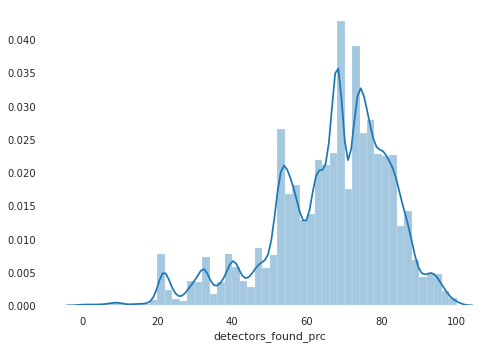

In [113]:
sns.distplot(Smoke.models['MultiLevel']['detectors_found_prc'])

In [108]:
Smoke.models['MultiLevel']

num_surveys  detectors_found_total  detectors_found_prc  \
geoid                                                                     
#_010139534001         39.0                   18.0                46.15   
#_010139534002         48.0                   19.0                39.58   
#_010730023034         44.0                   34.0                77.27   
#_010730035002         32.0                   18.0                56.25   
#_010730035003         34.0                   23.0                67.65   
...                     ...                    ...                  ...   
#_560459511001        892.0                  562.0                63.00   
#_560459511002        892.0                  562.0                63.00   
#_560459513001        892.0                  562.0                63.00   
#_560459513002        892.0                  562.0                63.00   
#_560459513003        892.0                  562.0                63.00   

                detectors_found_CI  detectors_working_total  \
geoid                                                         
#_010139534001           15.645969                     12.0   
#_010139534002           13.834508                      8.0   
#_010730023034           12.383258                     19.0   
#_010730035002           17.188239                      8.0   
#_010730035003           15.724891                     11.0   
...                            ...                      ...   
#_560459511001            3.168435                    347.0   
#_560459511002            3.168435                    347.0   
#_560459513001            3.168435                    347.0   
#_560459513002            3.168435                    347.0   
#_560459513003            3.168435                    347.0   

                detectors_working_prc  detectors_working_CI    geography  
geoid                                                                     
#_010139534001                  30.77             14.485540  block_group  
#_010139534002                  16.67             10.543965  block_group  
#_010730023034                  43.18             14.635975  block_group  
#_010730035002                  25.00             15.003125  block_group  
#_010730035003                  32.35             15.724891  block_group  
...                               ...                   ...          ...  
#_560459511001                  38.90              3.199404        state  
#_560459511002                  38.90              3.199404        state  
#_560459513001                  38.90              3.199404        state  
#_560459513002                  38.90              3.199404        state  
#_560459513003                  38.90              3.199404        state  

[217739 rows x 8 columns]

In [65]:
out['SVI_Theme_1'] = SVI.data['RPL_THEME1'].replace(-999.0, np.NaN)
out['SVI_Theme_3'] = SVI.data['RPL_THEME3'].replace(-999.0, np.NaN)
#out['SVI_Theme_4'] = SVI.data['RPL_THEME4'].replace(-999.0, np.NaN)
out['fire_propensity_risk_score'] = FPM.test_prediction_probs[:,1]
out['fire_severity_risk_score'] = FSM.test_prediction_probs[:,1]



In [66]:
# create and add final predictor 

#create fire_risk_score by weighing propensity and severity at a .8 to .2 ratio.
#We want the fire_risk_score to be half of the overall combinedRiskScore so multiple the fire_risk_score by 2.
out['fire_prop_weighted'] = out['fire_propensity_risk_score']*0.8
out['fire_sev_weighted'] = out['fire_severity_risk_score']*0.2
out['fire_risk_score'] = out.loc[:,['fire_prop_weighted', 'fire_sev_weighted']].mean(axis = 1, skipna = True)
out['fire_risk_score'] = out['fire_risk_score']*2

out['CombinedRiskScore'] =  out.loc[:,['smoke_detector_risk_score',
                                       'SVI_Theme_1',
                                       'fire_prop_weighted',
                                       'fire_sev_weighted'] ].mean(axis = 1, skipna = True) #False )

In [52]:
out.columns

Index(['fires_per_1K_pop_2009', 'fires_per_1K_pop_2010',
       'fires_per_1K_pop_2011', 'fires_per_1K_pop_2012',
       'fires_per_1K_pop_2013', 'fires_per_1K_pop_2014',
       'fires_per_1K_pop_2015', 'fires_per_1K_pop_2016',
       'fires_per_1K_pop_2017', 'did_not_work_past_12_mo',
       'house_pct_live_alone', 'pct_alt_heat', 'house_yr_pct_before_1960',
       'inc_pct_poverty', 'race_pct_black_or_amind', 'recorded_home_visits',
       'detectors_working_prc', 'detectors_working_CI', 'detectors_found_prc',
       'detectors_found_CI', 'geography',
       'Population Density (per square mile), 2010', 'detectors_predicted',
       'smoke_detector_risk_frac', 'smoke_detector_risk_score', 'SVI_Theme_1',
       'SVI_Theme_3', 'fire_propensity_risk_score', 'fire_severity_risk_score',
       'fire_prop_weighted', 'fire_sev_weighted', 'fire_risk_score',
       'CombinedRiskScore'],
      dtype='object')

## Outlier Analysis

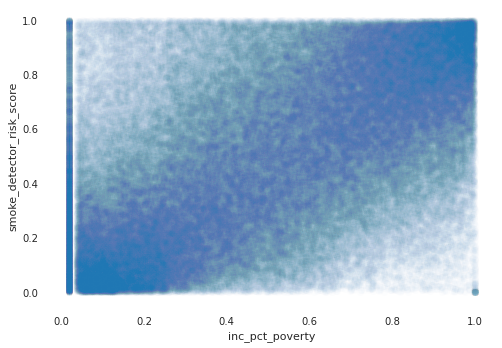

In [105]:
sns.scatterplot(ACS.data['inc_pct_poverty'].rank(pct= True),out['smoke_detector_risk_score'], alpha = .01)
plt.show()

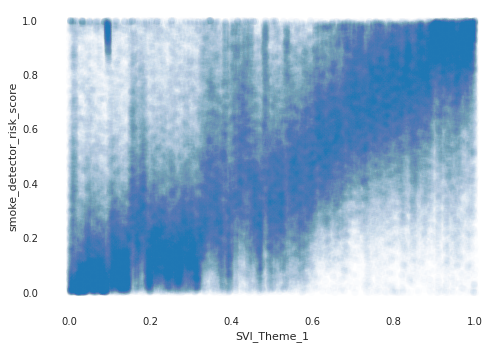

In [67]:
sns.scatterplot(out['SVI_Theme_1'],out['smoke_detector_risk_score'], alpha = .01)
plt.show()

In [68]:
smoke_outlier_flg= np.abs( out['SVI_Theme_1']-out['smoke_detector_risk_score']) > .3
smoke_outlier_flg_upper =  out['SVI_Theme_1']-out['smoke_detector_risk_score'] > .3
smoke_outlier_flg_lower =  out['SVI_Theme_1']-out['smoke_detector_risk_score'] < .3

In [74]:
out[smoke_outlier_flg]['geography'].value_counts()

county         36176
state           4855
tract           2901
block_group      806
Name: geography, dtype: int64

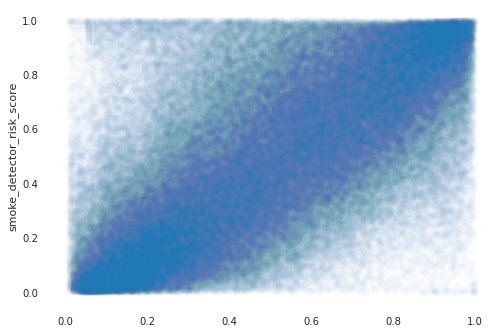

In [93]:
sns.scatterplot( (out['SVI_Theme_1'] + ACS.data['inc_pct_poverty'].rank(pct = True) )/ 2   ,out['smoke_detector_risk_score'], alpha = .01)
plt.show()

In [132]:
out['inc_pct_poverty'] = ACS.data['inc_pct_poverty'].rank(pct = True)

In [216]:
out['corrected_score1']=out[['smoke_detector_risk_score',
                             'SVI_Theme_1',
                             'inc_pct_poverty']
                              ].mean(axis=1,skipna=True) 

In [198]:
## fix for areas that do not have SVI data but do have acs inc_pct_poverty (currently ~100 records)
# NOTE: we still want areas without both SVI and ACS data to be nulls, hence why we are fixing this manually 
# do not set skipna to be false above, that will introduce outliers 


only_acs_idx =  out['SVI_Theme_1'].isna() &  ~out['inc_pct_poverty'].isna()


out.loc[only_acs_idx,'corrected_score1'] = out[only_acs_idx][['smoke_detector_risk_score',
                                                           'inc_pct_poverty']
                                                           ].mean(axis =1)



In [177]:
out.corrected_score1.isna().value_counts()

False    217739
Name: corrected_score1, dtype: int64

In [199]:
smoke_outlier_flg= np.abs( out['corrected_score1']-out['smoke_detector_risk_score']) > .3
smoke_outlier_flg_upper =  out['corrected_score1']-out['smoke_detector_risk_score'] > .3
smoke_outlier_flg_lower =  out['corrected_score1']-out['smoke_detector_risk_score'] < .3

In [200]:
out.corrected_score1.describe()

count    217739.000000
mean          0.502287
std           0.245982
min           0.007193
25%           0.300317
50%           0.504542
75%           0.703302
max           0.999148
Name: corrected_score1, dtype: float64

In [201]:
smoke_outlier_flg.sum() / smoke_outlier_flg.shape[0] 

0.07940699644987806

In [ ]:
sns.scatterplot(

In [117]:
JJ = pd.read_csv(utils.DATA['master'] / 'JJ Weighted Smoke Baseline Alarm Score 7.12.2022.csv' )
JJ['GEOID'] = JJ['GEOID'].str[2:]
JJ = JJ.set_index('GEOID')

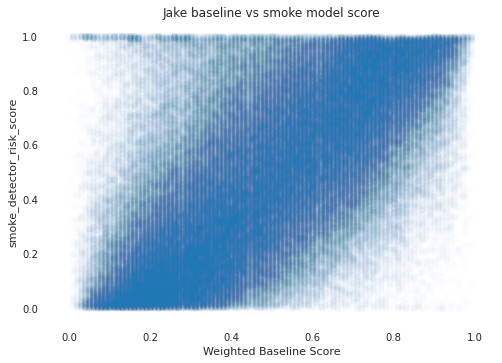

In [217]:
sns.scatterplot(JJ['Weighted Baseline Score'],out['smoke_detector_risk_score'] 
                , alpha = .01)
plt.title('Jake baseline vs smoke model score')
plt.show()

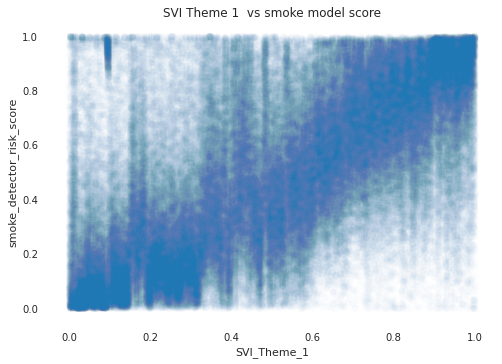

In [218]:
sns.scatterplot(out['SVI_Theme_1'],out['smoke_detector_risk_score']      
                , alpha = .01)
plt.title('SVI Theme 1  vs smoke model score')
plt.show()

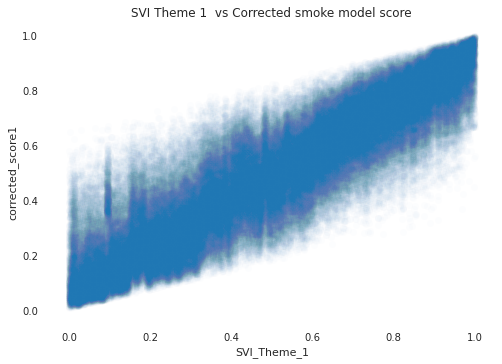

In [219]:
sns.scatterplot(out['SVI_Theme_1'],out['corrected_score1']      
                , alpha = .01)
plt.title('SVI Theme 1  vs Corrected smoke model score')
plt.show()

In [221]:
out['']

fires_per_1K_pop_2009  fires_per_1K_pop_2010  \
GEOID                                                        
010010201001               1.342282               2.684564   
010010201002               1.581028               0.790514   
010010202001               1.047120                    NaN   
010010202002               2.832861               2.832861   
010010203001               0.846024               1.269036   
...                             ...                    ...   
560459511001                    NaN                    NaN   
560459511002               0.632111                    NaN   
560459513001               0.868810                    NaN   
560459513002                    NaN                    NaN   
560459513003                    NaN                    NaN   

              fires_per_1K_pop_2011  fires_per_1K_pop_2012  \
GEOID                                                        
010010201001                    NaN                    NaN   
010010201002                    NaN               1.581028   
010010202001               3.141361                    NaN   
010010202002               2.832861               0.944287   
010010203001               0.846024               0.423012   
...                             ...                    ...   
560459511001                    NaN                    NaN   
560459511002                    NaN                    NaN   
560459513001               0.868810                    NaN   
560459513002               0.970874                    NaN   
560459513003               0.625391               0.625391   

              fires_per_1K_pop_2013  fires_per_1K_pop_2014  \
GEOID                                                        
010010201001                    NaN                    NaN   
010010201002               0.790514                    NaN   
010010202001               1.047120               1.047120   
010010202002               0.944287                    NaN   
010010203001               1.269036               0.423012   
...                             ...                    ...   
560459511001                    NaN                    NaN   
560459511002                    NaN                    NaN   
560459513001               0.868810               0.868810   
560459513002                    NaN               0.970874   
560459513003                    NaN               0.625391   

              fires_per_1K_pop_2015  fires_per_1K_pop_2016  \
GEOID                                                        
010010201001                    NaN               1.342282   
010010201002               1.581028               0.790514   
010010202001               1.047120               1.047120   
010010202002               0.944287                    NaN   
010010203001               0.423012               0.846024   
...                             ...                    ...   
560459511001                    NaN               1.372684   
560459511002               0.632111                    NaN   
560459513001                    NaN                    NaN   
560459513002                    NaN                    NaN   
560459513003                    NaN                    NaN   

              fires_per_1K_pop_2017  did_not_work_past_12_mo  ...  \
GEOID                                                         ...   
010010201001               1.342282                 0.355019  ...   
010010201002                    NaN                 0.309021  ...   
010010202001                    NaN                 0.509589  ...   
010010202002               3.777148                 0.309886  ...   
010010203001                    NaN                 0.294054  ...   
...                             ...                      ...  ...   
560459511001                    NaN                 0.301663  ...   
560459511002                    NaN                 0.288010  ...   
560459513001               1.737619                 0.232123  ...   
560459513002               

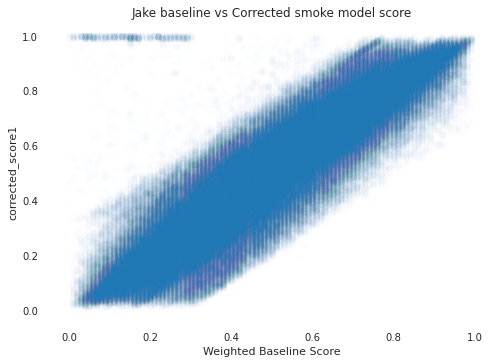

In [220]:
sns.scatterplot(JJ['Weighted Baseline Score'],out['corrected_score1']           
                , alpha = .01)
plt.title('Jake baseline vs Corrected smoke model score')
plt.show()

In [164]:
f'SmokeModelCorrected-{date.today()}.csv'

'SmokeModelCorrected-2022-07-13.csv'

In [227]:
to_save['weighted_baseline_score']<.3  to_save['corrected_score1']> .9 

SyntaxError: invalid syntax (<ipython-input-227-db1ca7add20b>, line 1)

In [166]:
to_save = out[['smoke_detector_risk_score','corrected_score1','SVI_Theme_1','inc_pct_poverty']].copy()
to_save['weighted_baseline_score'] = JJ['Weighted Baseline Score']
to_save.index = '#_' +  to_save.index 
to_save.to_csv(utils.DATA['model-outputs'] / f'SmokeModelCorrected-{date.today()}.csv' )

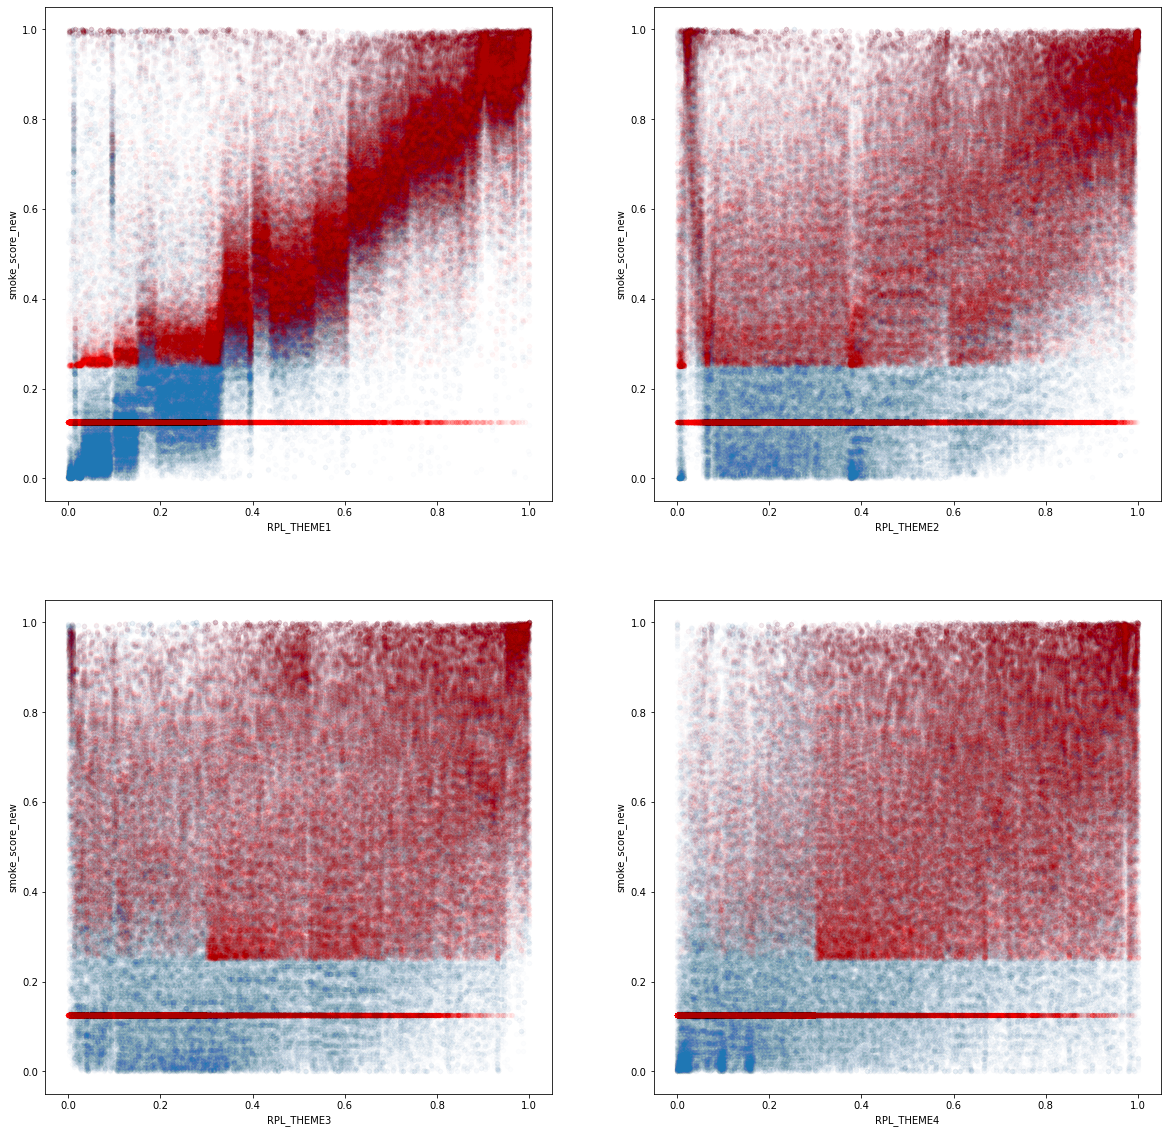

In [67]:
out_svi['new_smoke_frac'] = out_svi['smoke_detector_risk_frac']
out_svi.loc[out_svi[["RPL_THEME1","RPL_THEME3", "RPL_THEME4"]].median(axis =1 ) <.3, 'new_smoke_frac'] = 0
out_svi['smoke_score_new'] =  out_svi['new_smoke_frac'].rank(pct=True)
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize=(20,20))
axe = ax.ravel()
RPLs = ['RPL_THEME1','RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']
for i in range(len(RPLs)):
    out_svi.plot.scatter(x = RPLs[i], y = 'smoke_detector_risk_score', ax=axe[i], alpha = 0.01)
    out_svi.plot.scatter(x = RPLs[i], y = 'smoke_score_new', ax=axe[i], alpha = 0.01, color = 'red')


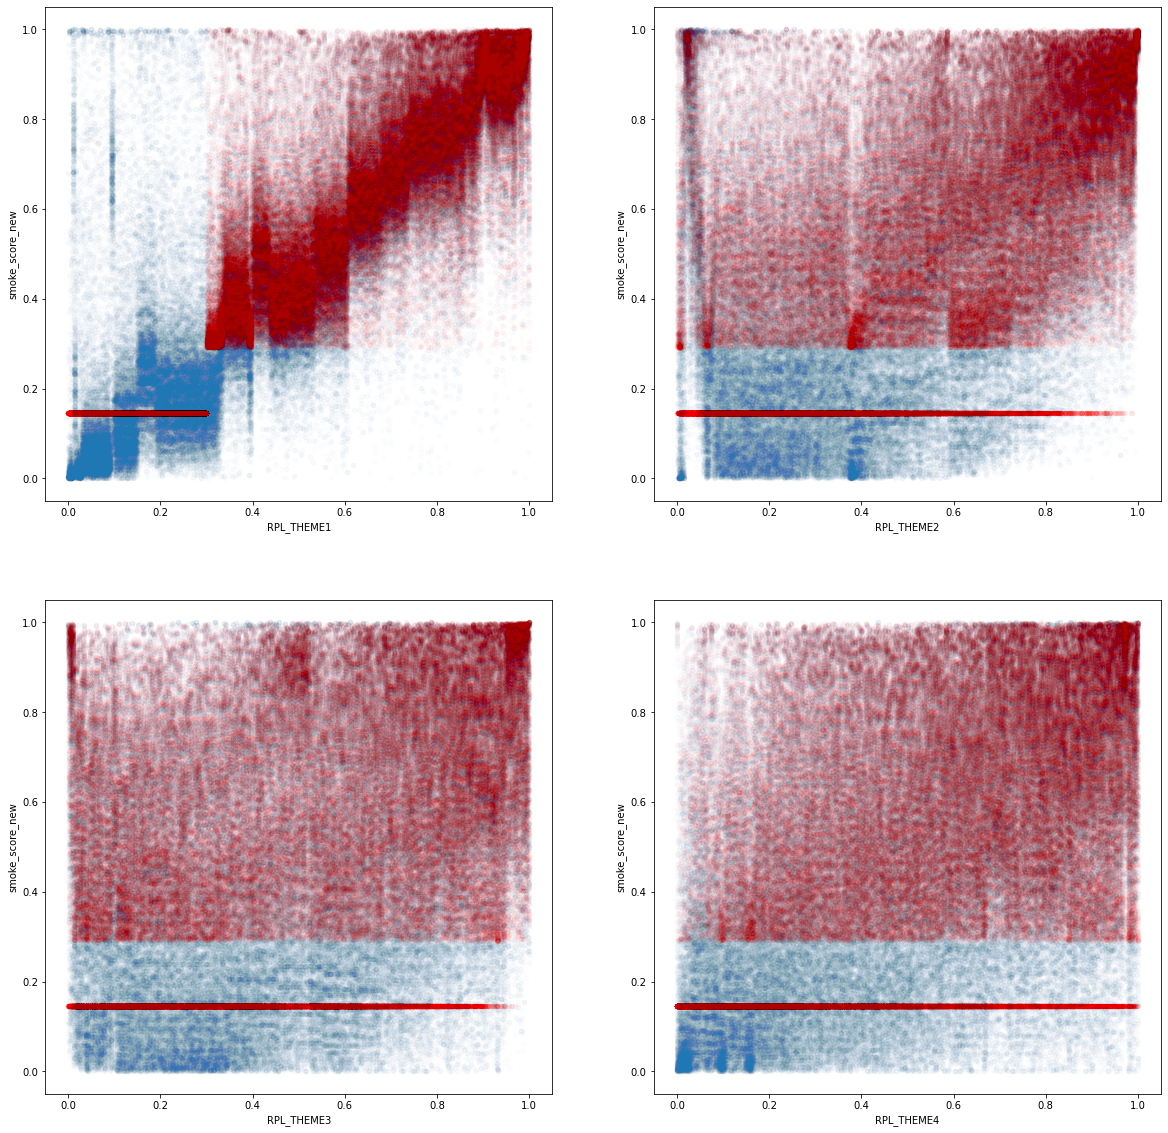

In [75]:
out_svi['new_smoke_frac'] = out_svi['smoke_detector_risk_frac']
out_svi.loc[out_svi[["RPL_THEME1"]].median(axis =1 ) <.3, 'new_smoke_frac'] = 0
out_svi['smoke_score_new'] =  out_svi['new_smoke_frac'].rank(pct=True)
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize=(20,20))
axe = ax.ravel()
RPLs = ['RPL_THEME1','RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']
for i in range(len(RPLs)):
    out_svi.plot.scatter(x = RPLs[i], y = 'smoke_detector_risk_score', ax=axe[i], alpha = 0.01)
    out_svi.plot.scatter(x = RPLs[i], y = 'smoke_score_new', ax=axe[i], alpha = 0.01, color = 'red')


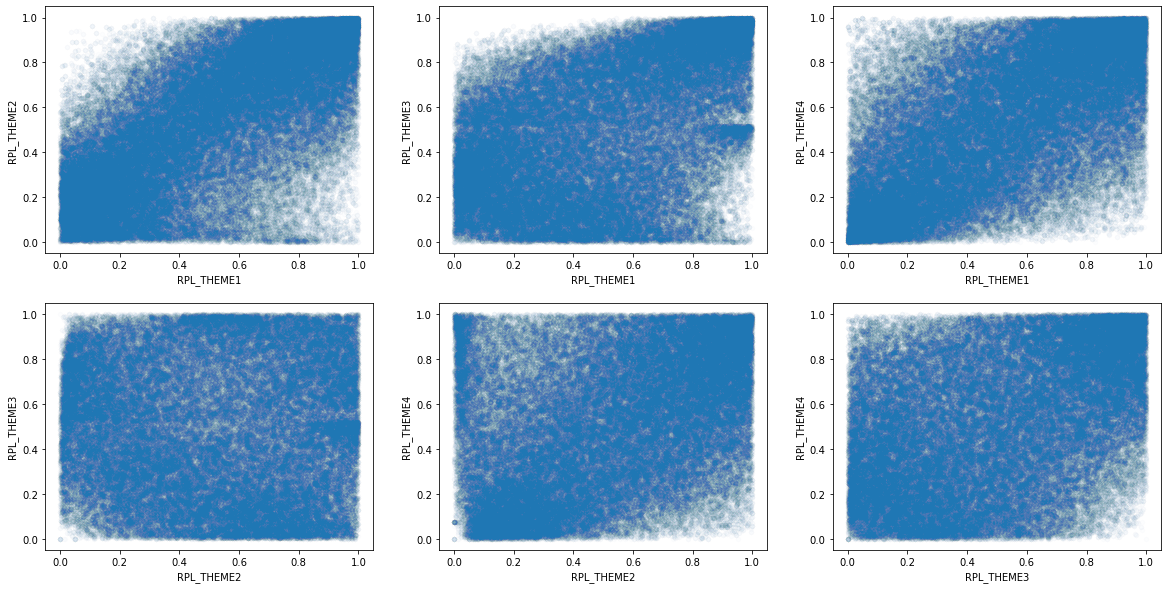

In [74]:
fig, ax = plt.subplots(ncols=3, nrows = 2, figsize=(20,10))
axe = ax.ravel()
RPLs = ['RPL_THEME1','RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']
c = 0
for i in range(len(RPLs)):
    for j in range(i+1, len(RPLs)):
        out_svi.plot.scatter(x = RPLs[i], y = RPLs[j], ax=axe[c], alpha = 0.01)
        c += 1


## Stats Model2

Can we see what percentage of areas are high risk based on SVI and create a linear model from that 

In [61]:
smoke_prediction

num_surveys  detectors_found_total  detectors_found_prc  \
geoid                                                                   
010139534001         39.0                   18.0                46.15   
010139534002         48.0                   19.0                39.58   
010730023034         44.0                   34.0                77.27   
010730035002         32.0                   18.0                56.25   
010730035003         34.0                   23.0                67.65   
...                   ...                    ...                  ...   
560459511001        892.0                  562.0                63.00   
560459511002        892.0                  562.0                63.00   
560459513001        892.0                  562.0                63.00   
560459513002        892.0                  562.0                63.00   
560459513003        892.0                  562.0                63.00   

              detectors_found_CI  detectors_working_total  \
geoid                                                       
010139534001           15.645969                     12.0   
010139534002           13.834508                      8.0   
010730023034           12.383258                     19.0   
010730035002           17.188239                      8.0   
010730035003           15.724891                     11.0   
...                          ...                      ...   
560459511001            3.168435                    347.0   
560459511002            3.168435                    347.0   
560459513001            3.168435                    347.0   
560459513002            3.168435                    347.0   
560459513003            3.168435                    347.0   

              detectors_working_prc  detectors_working_CI    geography  \
geoid                                                                    
010139534001                  30.77             14.485540  block_group   
010139534002                  16.67             10.543965  block_group   
010730023034                  43.18             14.635975  block_group   
010730035002                  25.00             15.003125  block_group   
010730035003                  32.35             15.724891  block_group   
...                             ...                   ...          ...   
560459511001                  38.90              3.199404        state   
560459511002                  38.90              3.199404        state   
560459513001                  38.90              3.199404        state   
560459513002                  38.90              3.199404        state   
560459513003                  38.90              3.199404        state   

                    tract  Predictions  \
geoid                                    
010139534001  01013953400    49.877258   
010139534002  01013953400    47.638046   
010730023034  01073002303    64.497314   
010730035002  01073003500    68.048447   
010730035003  01073003500    68.048447   
...                   ...          ...   
560459511001  56045951100    60.088554   
560459511002  56045951100    60.088554   
560459513001  56045951300    70.665405   
560459513002  56045951300    71.693764   
560459513003  56045951300    70.665405   

              Population Density (per square mile), 2010  
geoid                                                     
010139534001                                        30.6  
010139534002                                        30.6  
010730023034                                      2370.0  
010730035002                                       978.9  
010730035003                                       978.9  
...                                                  ...  
560459511001                                         1.4  
560459511002                                         1.4  
560459513001                                        91.0  
560459513002                                        91.0  
560459513003                                        

In [70]:
out.columns

Index(['fires_per_1K_pop_2009', 'fires_per_1K_pop_2010',
       'fires_per_1K_pop_2011', 'fires_per_1K_pop_2012',
       'fires_per_1K_pop_2013', 'fires_per_1K_pop_2014',
       'fires_per_1K_pop_2015', 'fires_per_1K_pop_2016',
       'fires_per_1K_pop_2017', 'recorded_home_visits',
       'detectors_working_prc', 'detectors_working_CI', 'geography',
       'Population Density (per square mile), 2010', 'detectors_predicted',
       'smoke_detector_risk_frac', 'smoke_detector_risk_score', 'SVI_Theme_1',
       'fire_propensity_risk_score', 'fire_severity_risk_score',
       'fire_prop_weighted', 'fire_sev_weighted', 'fire_risk_score',
       'CombinedRiskScore', 'SVI_Theme_3', 'SVI_Theme_4'],
      dtype='object')

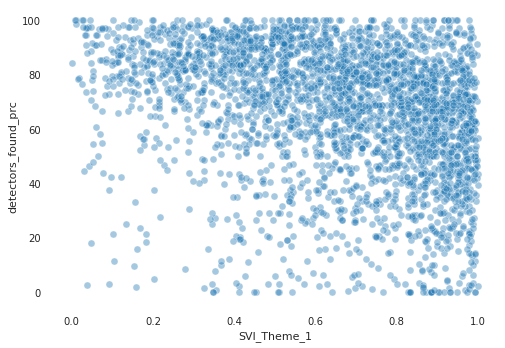

In [85]:
sns.scatterplot(out[out['geography'] == 'block_group']['SVI_Theme_1'], out[out['geography'] == 'block_group']['detectors_found_prc'], alpha = .4)

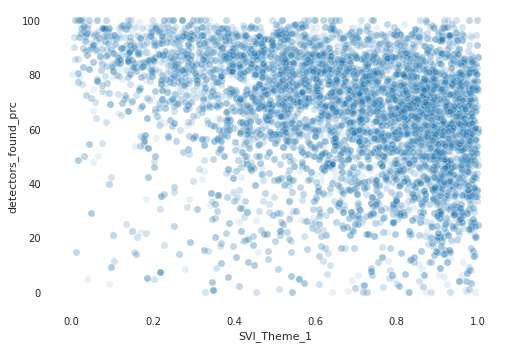

In [86]:
sns.scatterplot(out[out['geography'] == 'tract']['SVI_Theme_1'], out[out['geography'] == 'tract']['detectors_found_prc'], alpha = .1)

In [101]:
sm =  out[out['geography'].isin( ['block_group','tract'])]

In [ ]:
[],[]= data,index
for pct in linspace(start=0.01,stop=1,steps=20):
    
    index.append(pct)
    
    
    
    